## Markov Decision Processes (10 pts, 3 bonus)

Assignment:
* The environment is FULLY observable.
* No graphical rendering is needed.
* Use ONLY discrete states (i.e., instead of images, you will return the real
environment state as observation).
* Use a reduced state space (e.g., the state of the grid should be small - at most
$10\times10$). Adapt the number of walls, ghosts or invaders accordingly.
* Use ONLY discrete actions.
* Except the agent (i.e., the player) everything is STATIC.
* Write a simple test program where you create an instance of the enironment and you
execute a sequence of at least 5 random actions, printing (or showing in any form
you prefer) the observation you get out of it.
- Bonus Points (3 pts): Expose the transition model from the environment to the agent, implement the value iteration algorithm and run it on your environment. '

# Introduction to MDP

At each time step, the agent performs an action which leads to two things: changing the environment state and the agent (possibly) receiving a reward (or penalty) from the environment. The goal of the agent is to discover an optimal policy (i.e. what actions to do in each state) such that it maximizes the total value of rewards received from the environment in response to its actions. MDPis used to describe the agent/ environment interaction settings in a formal way.

MDP consits of a tuple of 5 elements:
* $S -$ set of states. At each time step the state of the enviropment is an element $s ∈ S.$
* $A -$ set of actions. At each time step the agent choses an action $a ∈ A$ to perform.
* $T = p(s_{t+1} | s_t, a_t)$ $-$ (State) Transition model, which depicts how the enivorments states changes when the agent performs an action $a$ depending on the $a$ and the current state $s$.
* $R(s) = p(r_{t+1} | s_t, a_t)$ $-$ Reward model that depicts the real-valued reward value that the agent receives from the enviroment after performing an action. Values depend on the current state and action performed.
* $\gamma $ $-$ discount factor that controls the importance of future awards. Where $0 \leq \gamma \leq 1$. The reason for using discount factor is to prevent the total reward from going to infinity. Controls immidiete vs long-term reward.

Remember that MDPs are: __fully observable__

A fixed action sequence does __NOT__ solve the problem, as an agent might end in a different state from the goal. Hence, we must specify what the agent should do for any state in which it finds itself. This solution is called the agent __policy__ $\pi$ :
> $\pi(s): S \rightarrow A$

There two types of enviroments:
* A __Deterministic enviroment__, where both the state transition model $T$ and reward model $R(s)$ are deterministic functions. If the agent while in a given state repeats a given action, it will always go to the __same next state__ and receive the __same reward value__.
* A __Stochastic environment__, where there is uncertainty about the actions effect. When the agent repeats doing the same action in a given state, the new state and received reward may not be the same each time.

### Bellman Equation
Bellman equation using dynamic programming paradigm provides a recursive definition for the optimal Q-function.
* A relation between utility of a state and utility of its neighbors

> $ U(s) = R(s) + \gamma \max\limits_{a \in A} \sum_{s_{t+1}} p(s_{t+1} | s_t, a_t) U(s_{t+1})$

## Value iteration algorithm
Assumption: the agent knows the MDP model of the world (i.e. the agent knows the state-transition and reward probability functions) $\rightarrow$ can be used by the agent (offline) to plan its action given  knowledge about the enviroment before interacting with it.

* n possible states→n Bellman equations (one per state)→n unknowns
* Equations are nonlinear (max operation is nonlinear)
* Solution is hard, but we can use iterative approaches

Overview:

1. Start with arbitrary initial values for utilities
2. Until we reach equilibrium:
    - For each state simultaneously:
    $ U_{i+1} \leftarrow R(s) + \gamma \max\limits_{a \in A} \sum_{s_{t+1}} p(s_{t+1} | s_t, a_t) U(s_{t+1})$
    - Equilibrium is guaranted to be reached, and this is the solution to the equations
    - Solutions ar eunique and the corresponding policy is optimal


### Value (utility) function
The value function represents how good is a state for an agent to be in. 

It is equal to expected total reward for an agent starting from state $s$. The value function depends on the policy by which the agent picks actions to perform. So, if the agent uses a given policy $\pi$ to select actions, the corresponding value function is given by:
> $U^\pi(s) = E [\sum_{T}^{i=1} \gamma^{i-1} r_i] \forall s \in S$

> Among all possible value-functions, there exist an optimal value function that has higher value than other functions for all states.

> $U^{*}(s) = \max\limits_{\pi} U^{\pi}(s)$   $ \forall s \in S$

> The optimal policy 𝛑* is the policy that corresponds to optimal value function.

> $\pi^{*} = \arg \max\limits_{\pi} U^{\pi}(s)$   $\forall s \in S$

Maximize your score in the Atari 2600 game Breakout. In this environment, the observation is an RGB image of the screen, which is an array of shape $(210, 160, 3)$ Each action is repeatedly performed for a duration of kk frames, where kk is uniformly sampled from $\{2, 3, 4\}$.



In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import display

import gym

from matplotlib import animation
from JSAnimation.IPython_display import display_animation

[2018-12-12 21:53:22,115] Making new env: Breakout-v0


<IPython.core.display.Javascript object>


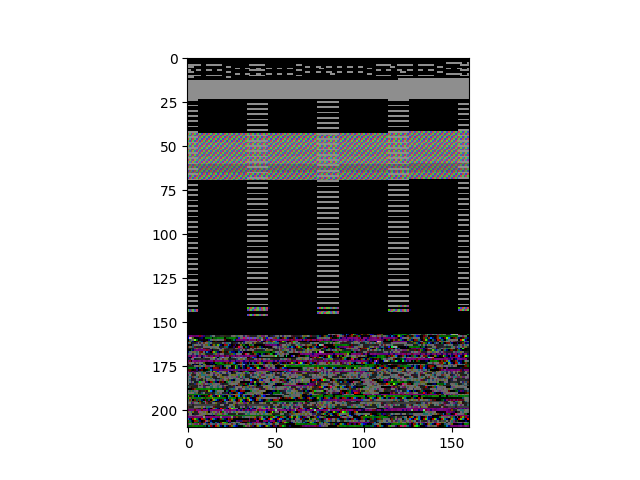

In [7]:
# Create the environment and display the initial state
env = gym.make('Breakout-v0')
observation = env.reset()
firstframe = env.render(mode = 'rgb_array')
fig,ax = plt.subplots()
im = ax.imshow(firstframe) 


In [4]:
im

NameError: name 'im' is not defined

In [4]:
def display_frames_as_gif(frames, filename_gif = None):
    """
    Displays a list of frames as a gif, with controls
    """
    
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    if filename_gif: 
        anim.save(filename_gif, writer = 'imagemagick', fps=20)
    display(display_animation(anim, default_mode='loop'))

In [6]:
observation = env.reset()
frames = []
for _ in range(100):
    observation, reward, done, info = env.step(env.action_space.sample())
    frame = env.render(mode = 'rgb_array')
    im.set_data(frame)
    frames.append(frame)

In [8]:
observation, reward, done, info

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), 0.0, False, {'ale.lives': 3})

## displaying random actions

<IPython.core.display.Javascript object>


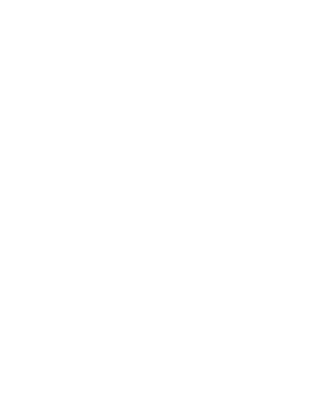


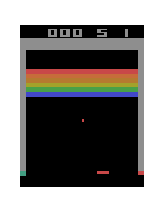
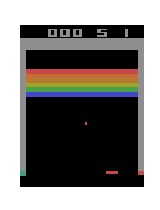
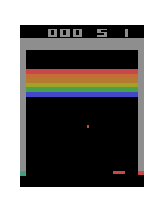
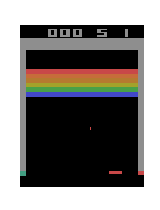
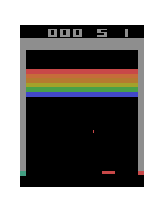
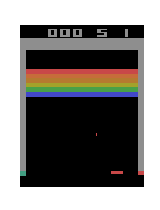
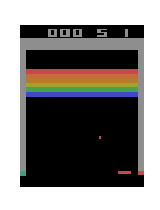
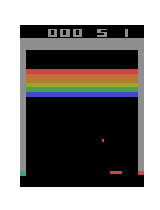
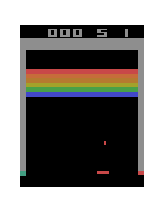
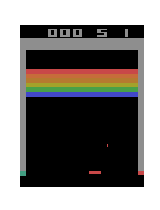
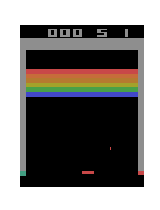
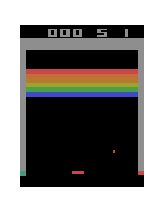
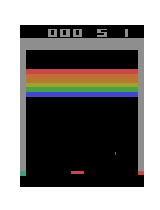
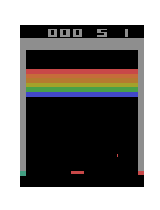
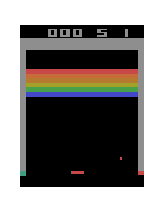
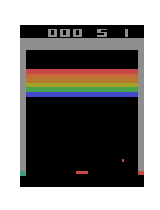
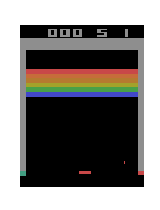
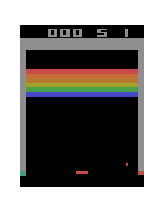
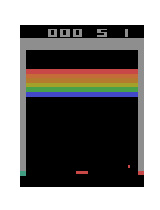
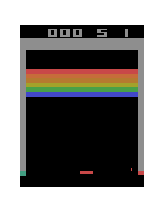
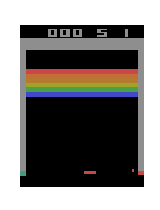
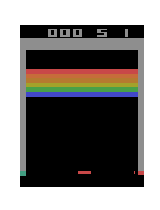
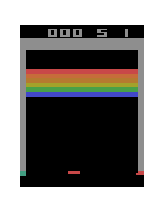
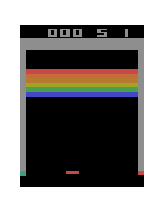
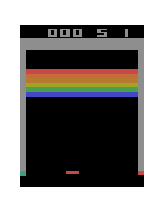
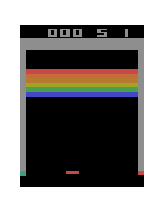
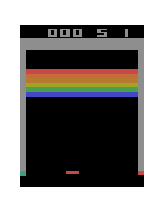
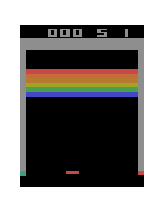
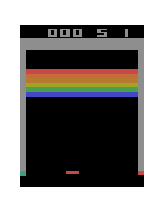
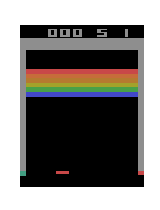
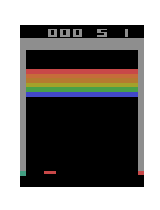
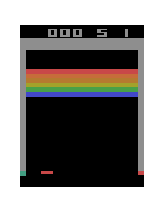
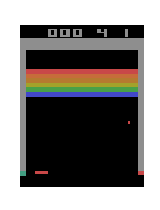
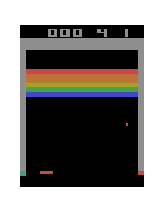
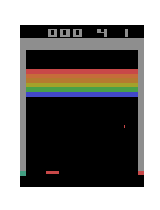
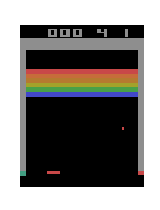
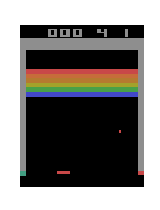
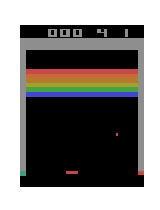
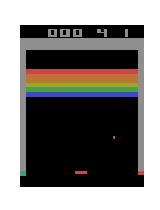
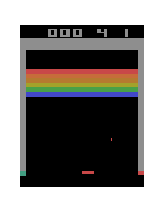
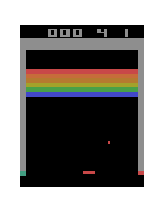
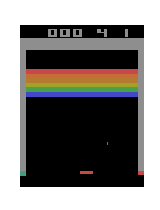
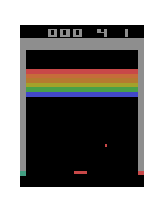
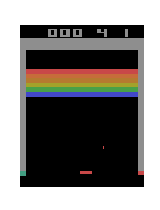
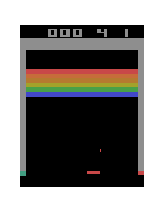
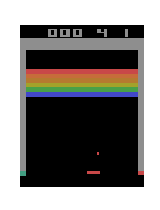
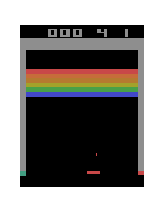
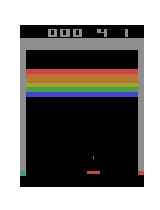
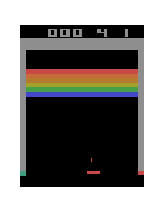
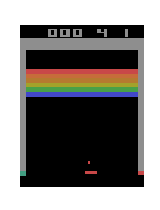
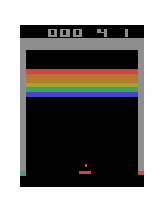
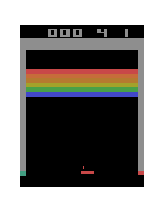
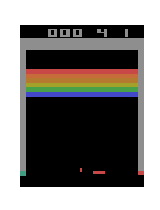
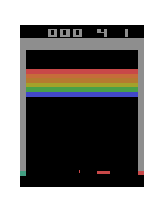
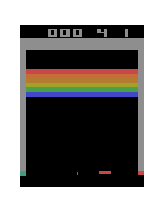
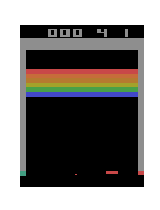
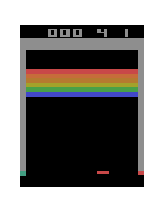
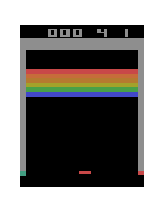
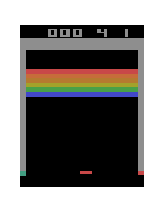
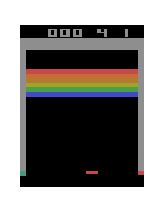
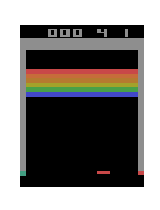
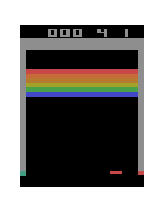
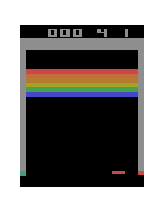
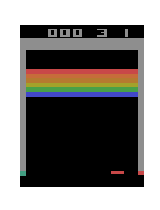
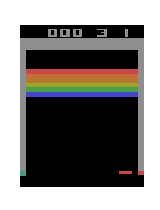
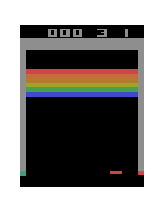
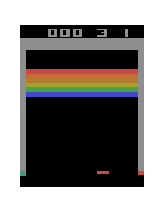
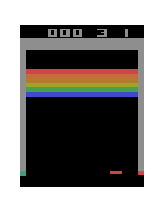
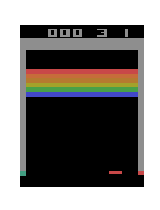
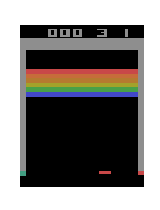
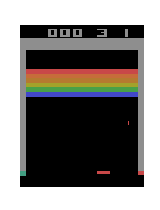
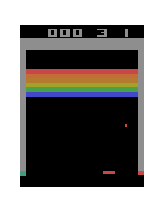
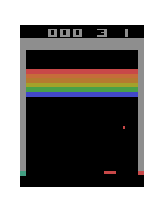
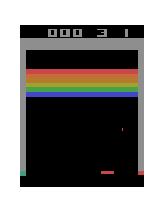
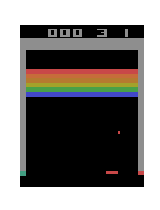
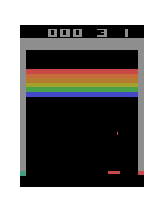
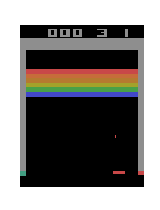
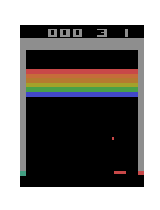
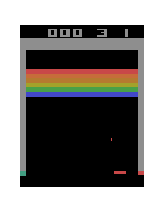
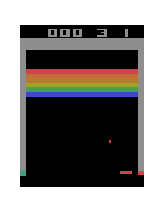
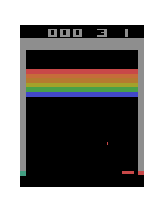
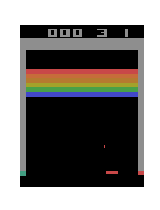
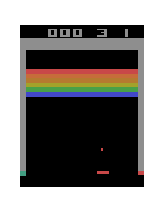
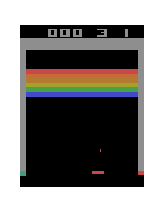
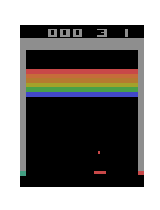
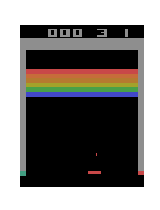
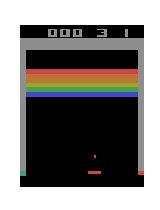
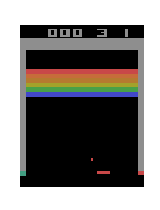
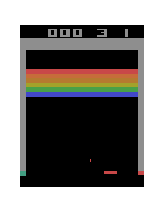
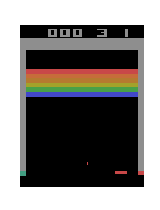
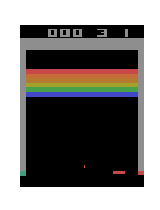
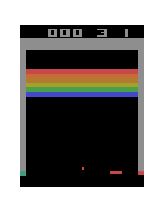
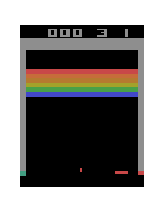
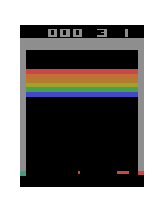
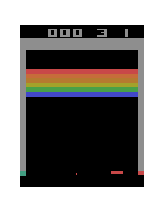
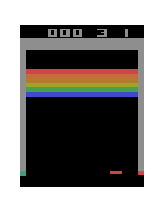
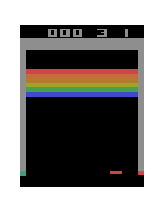
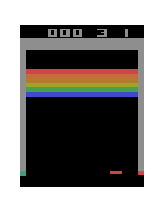
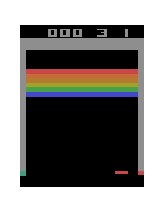
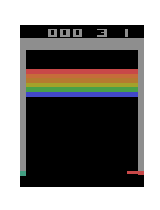

In [7]:
display_frames_as_gif(frames, filename_gif='THIStest.gif')